<h1><b>Parkinson's Disease Classification<b></h1>

<h2><b><span style = "color:Red"> Importing Important Libraries

In [4]:
import numpy as np
import pandas as pd

<h3><b><span style = "color:Yellow">Dataset Reading and Exploration

In [6]:
df1 = pd.read_csv("Datasets/pd_speech_features.csv")

In [7]:
df1.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [8]:
df1.columns

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


<h3><b><span style = "color:#f1cfc8">Selecting the Variables

In [11]:
X = df1.iloc[:, 0:754].values  # select the independent variables
y = df1.iloc[:, 754].values    # select the dependent variable and target column

<h3><b><span style = "color:#f1ecc8">Dataset Processing and Feature Modification

In [12]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [13]:
X_mean = np.mean(X, axis=0)
# cov_mat = np.cov(X) # another method 
cov_mat = (X - X_mean).T.dot((X - X_mean)) / (X.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.0013245  -0.13378215  0.02670192 ... -0.05811108 -0.05788379
  -0.05584903]
 [-0.13378215  1.0013245   0.01018855 ...  0.12910653  0.10787687
   0.10496656]
 [ 0.02670192  0.01018855  1.0013245  ...  0.04623629  0.03743406
   0.03964023]
 ...
 [-0.05811108  0.12910653  0.04623629 ...  1.0013245   0.94926382
   0.7861811 ]
 [-0.05788379  0.10787687  0.03743406 ...  0.94926382  1.0013245
   0.86784425]
 [-0.05584903  0.10496656  0.03964023 ...  0.7861811   0.86784425
   1.0013245 ]]


In [14]:
print('NumPy covariance matrix: \n%s' %np.cov(X.T))

NumPy covariance matrix: 
[[ 1.0013245  -0.13378215  0.02670192 ... -0.05811108 -0.05788379
  -0.05584903]
 [-0.13378215  1.0013245   0.01018855 ...  0.12910653  0.10787687
   0.10496656]
 [ 0.02670192  0.01018855  1.0013245  ...  0.04623629  0.03743406
   0.03964023]
 ...
 [-0.05811108  0.12910653  0.04623629 ...  1.0013245   0.94926382
   0.7861811 ]
 [-0.05788379  0.10787687  0.03743406 ...  0.94926382  1.0013245
   0.86784425]
 [-0.05584903  0.10496656  0.03964023 ...  0.7861811   0.86784425
   1.0013245 ]]


In [15]:
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eigenvectors[:5])
print('\nEigenvalues \n%s' %eigenvalues[:5])

Eigenvectors 
[[-7.34343947e-03 -1.16719053e-03  6.51538260e-03 ...  9.65305801e-09
  -1.03919510e-06  4.48024718e-07]
 [ 4.50265736e-02 -4.70096509e-02 -6.29257413e-03 ... -1.34574766e-07
  -8.83999313e-07 -6.31420042e-06]
 [-1.73695965e-02 -1.04538133e-02 -5.76635105e-02 ...  2.33494166e-08
   2.60437003e-06 -6.82636594e-06]
 [ 4.92192614e-02 -2.46931648e-03  1.58072835e-03 ...  1.47522516e-07
   6.92927735e-06 -2.14875652e-05]
 [ 5.49956743e-02 -4.58086092e-03  4.95065904e-02 ... -4.38392747e-08
   5.68029739e-06 -7.60266017e-06]]

Eigenvalues 
[97.73833579 70.80079574 62.22641008 32.3546798  26.90448685]


In [16]:
len(eigenvalues)

754

In [17]:
total_of_eigenvalues = sum(eigenvalues)
varariance = [(i / total_of_eigenvalues)*100 for i in sorted(eigenvalues, reverse=True)]

varariance[:50]

[12.945497649128221,
 9.377605291277405,
 8.241923079119951,
 4.285395570467562,
 3.563514443250979,
 2.992421117144732,
 2.50824799138592,
 2.211802240978647,
 2.0327945235077918,
 1.8219685053528067,
 1.764887618922754,
 1.4932749143002968,
 1.30515358943006,
 1.271242748039766,
 1.2675001467996359,
 1.1662274492028095,
 1.067750828584221,
 1.0569704086230718,
 0.948421375982152,
 0.9343986018183823,
 0.8664490917172963,
 0.8054486120155179,
 0.7619017160440678,
 0.7386731197986595,
 0.6675490829100312,
 0.6269640033489295,
 0.6230528890774691,
 0.6081042667178629,
 0.5863152359934476,
 0.5587794280264594,
 0.5263561269283525,
 0.521934023852452,
 0.49848971279815485,
 0.4815530140957352,
 0.4692146311775066,
 0.45737160607826177,
 0.441115975012487,
 0.4154045147379747,
 0.40295019727398945,
 0.3806075514009982,
 0.3772762864733803,
 0.3687919504110242,
 0.36037333481328276,
 0.3503888439964801,
 0.34600638834247177,
 0.34150382897913806,
 0.33567533888366946,
 0.31494259655231943,


<h3><b><span style = "color:blue"> Dataset Visualisation

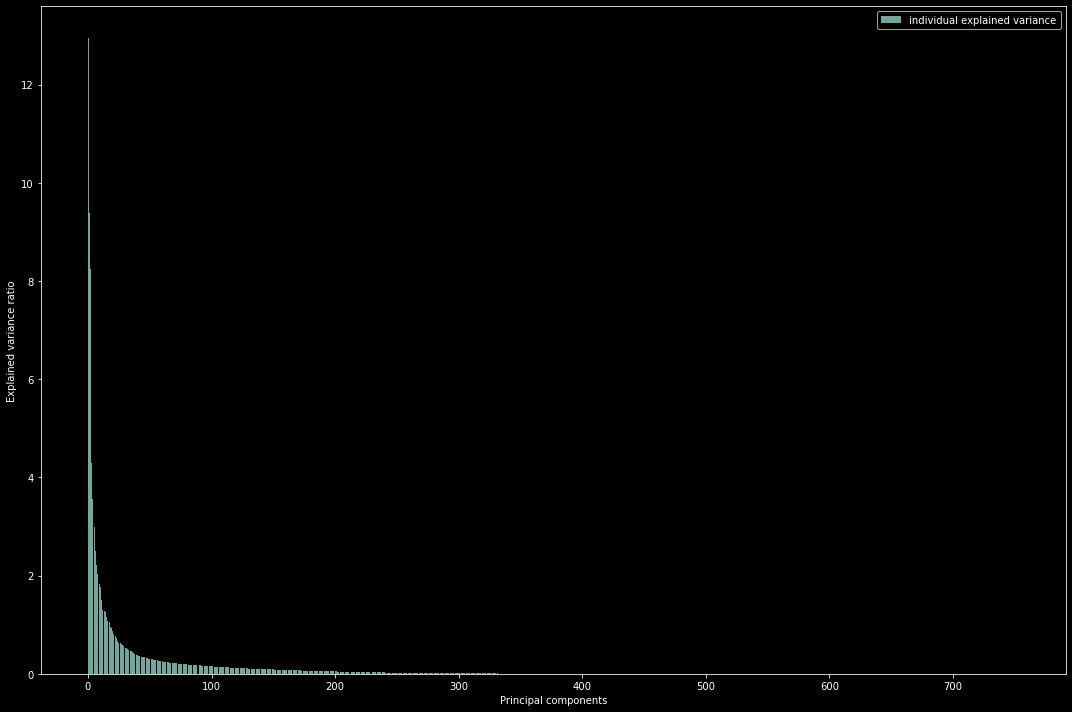

In [18]:
import matplotlib.pyplot as plt

with plt.style.context('dark_background'):
    plt.figure(figsize=(15, 10))

    plt.bar(range(len(eigenvalues)), varariance, alpha=0.8, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [19]:
varariance[0]

12.945497649128221

In [20]:
eigenpairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]

# Sorting eigenvalues and eigenvectors from higher values to lower values
eigenpairs.sort(key=lambda x: x[0], reverse=True)

eigenpairs[0][0]

97.73833578737317

In [21]:
eigenpairs[5][1].shape

(754,)

In [22]:
 #only for 6 features 
matrix_weighing = np.hstack((eigenpairs[0][1].reshape(754,1),
                      eigenpairs[1][1].reshape(754,1),
                      eigenpairs[2][1].reshape(754,1),
                      eigenpairs[3][1].reshape(754,1),
                      eigenpairs[4][1].reshape(754,1),
                      eigenpairs[5][1].reshape(754,1)))
matrix_weighing

array([[-0.00734344, -0.00116719,  0.00651538, -0.01492142, -0.02300192,
        -0.02108613],
       [ 0.04502657, -0.04700965, -0.00629257,  0.02420969,  0.01025892,
        -0.0093586 ],
       [-0.0173696 , -0.01045381, -0.05766351,  0.01222901, -0.0054791 ,
        -0.02363094],
       ...,
       [ 0.01324704,  0.00858509, -0.0217637 ,  0.01327137,  0.03581234,
         0.023377  ],
       [ 0.01942424,  0.01718094, -0.02271759,  0.01791082,  0.02336868,
         0.02014452],
       [ 0.02902069,  0.03571027, -0.02900893,  0.02433487,  0.01406922,
         0.01866721]])

In [23]:
Y = X.dot(matrix_weighing)
Y.shape

(756, 6)

In [25]:

df1["class"].unique()

array([1, 0], dtype=int64)

<ipython-input-26-6464d872e530>:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  plt.scatter(Y[y==lab, 0], Y[y==lab, 1], label=lab, c=col)


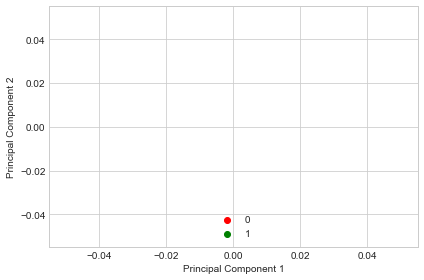

In [26]:
import matplotlib.pyplot as plt

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('0', '1'), ('red', 'green')):
        plt.scatter(Y[y==lab, 0], Y[y==lab, 1], label=lab, c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout();
    plt.show();

Text(0, 0.5, 'Cumulative explained variance')

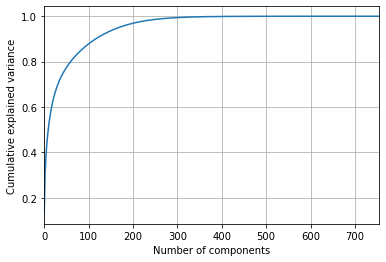

In [27]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,754,1)
plt.grid()
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [29]:
# Standard scaler haline getirme verileri
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print("X_train shape = ",X_train.shape)
print("X_test shape = ",X_test.shape)

X_train shape =  (604, 754)
X_test shape =  (152, 754)


In [30]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)

X_train2 = pca.fit_transform(X_train) # sadece bir tane PCA ile çalışıyor aynı uzayda olması için
X_test2 = pca.transform(X_test)       # test verisini eğitmiyoruz sadece transform uyguluyoruz

print("X_train2 shape = ",X_train2.shape)
print("X_test2 shape = ",X_test2.shape)

X_train2 shape =  (604, 6)
X_test2 shape =  (152, 6)


In [31]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [32]:
classifier2 = LogisticRegression(random_state=0)
classifier2.fit(X_train2,y_train)

LogisticRegression(random_state=0)

In [33]:
y_pred = classifier.predict(X_test)    # without PCA
y_pred2 = classifier2.predict(X_test2) # after PCA

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, datasets, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#actual / PCA olmadan çıkan sonuç
print("Comparison between real and before PCA")

print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred))
print('Classification \n', classification_report(y_test, y_pred))

Comparison between real and before PCA
Accuracy Score: 0.8092105263157895
Confusion matrix 
 [[25 13]
 [16 98]]
Classification 
               precision    recall  f1-score   support

           0       0.61      0.66      0.63        38
           1       0.88      0.86      0.87       114

    accuracy                           0.81       152
   macro avg       0.75      0.76      0.75       152
weighted avg       0.81      0.81      0.81       152



In [35]:
print("Comparison between real and after PCA ")

print('Accuracy Score:', accuracy_score(y_test, y_pred2))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred2))
print('Classification \n', classification_report(y_test, y_pred2))

Comparison between real and after PCA 
Accuracy Score: 0.8157894736842105
Confusion matrix 
 [[ 19  19]
 [  9 105]]
Classification 
               precision    recall  f1-score   support

           0       0.68      0.50      0.58        38
           1       0.85      0.92      0.88       114

    accuracy                           0.82       152
   macro avg       0.76      0.71      0.73       152
weighted avg       0.80      0.82      0.81       152



In [36]:
#Support Vector Machine
from sklearn.svm import SVC
 

classifier = SVC()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Support Vector Machine:")

print("Comparison between real and before PCA")

print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred))
print('Classification \n', classification_report(y_test, y_pred))

Support Vector Machine:
Comparison between real and before PCA
Accuracy Score: 0.8355263157894737
Confusion matrix 
 [[ 17  21]
 [  4 110]]
Classification 
               precision    recall  f1-score   support

           0       0.81      0.45      0.58        38
           1       0.84      0.96      0.90       114

    accuracy                           0.84       152
   macro avg       0.82      0.71      0.74       152
weighted avg       0.83      0.84      0.82       152



In [37]:
#Support Vector Machine
from sklearn.svm import SVC
 

classifier = SVC()
classifier.fit(X_train2,y_train)
y_pred2 = classifier.predict(X_test2)
cm = confusion_matrix(y_test,y_pred2)
accuracy = accuracy_score(y_test,y_pred2)
print("Support Vector Machine:")

print("Comparison between real and after PCA")

print('Accuracy Score:', accuracy_score(y_test, y_pred2))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred2))
print('Classification \n', classification_report(y_test, y_pred2))

Support Vector Machine:
Comparison between real and after PCA
Accuracy Score: 0.8289473684210527
Confusion matrix 
 [[ 19  19]
 [  7 107]]
Classification 
               precision    recall  f1-score   support

           0       0.73      0.50      0.59        38
           1       0.85      0.94      0.89       114

    accuracy                           0.83       152
   macro avg       0.79      0.72      0.74       152
weighted avg       0.82      0.83      0.82       152



In [38]:
from sklearn.model_selection import train_test_split


from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

classifier = DT(criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

print("Decision Tree Classifier :")

print("Comparison between real and before PCA")

print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred))
print('Classification \n', classification_report(y_test, y_pred))

Decision Tree Classifier :
Comparison between real and before PCA
Accuracy Score: 0.8552631578947368
Confusion matrix 
 [[ 25  13]
 [  9 105]]
Classification 
               precision    recall  f1-score   support

           0       0.74      0.66      0.69        38
           1       0.89      0.92      0.91       114

    accuracy                           0.86       152
   macro avg       0.81      0.79      0.80       152
weighted avg       0.85      0.86      0.85       152



In [39]:
from sklearn.model_selection import train_test_split


from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

classifier = DT(criterion='entropy', random_state=0)
classifier.fit(X_train2,y_train)
y_pred2 = classifier.predict(X_test2)


print("Comparison between real and after PCA")

print('Accuracy Score:', accuracy_score(y_test, y_pred2))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred2))
print('Classification \n', classification_report(y_test, y_pred2))

Comparison between real and after PCA
Accuracy Score: 0.756578947368421
Confusion matrix 
 [[23 15]
 [22 92]]
Classification 
               precision    recall  f1-score   support

           0       0.51      0.61      0.55        38
           1       0.86      0.81      0.83       114

    accuracy                           0.76       152
   macro avg       0.69      0.71      0.69       152
weighted avg       0.77      0.76      0.76       152



In [40]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("K-Neighbors Classifier :")

print("Comparison between real and before PCA")

print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred))
print('Classification \n', classification_report(y_test, y_pred))

K-Neighbors Classifier :
Comparison between real and before PCA
Accuracy Score: 0.8421052631578947
Confusion matrix 
 [[ 21  17]
 [  7 107]]
Classification 
               precision    recall  f1-score   support

           0       0.75      0.55      0.64        38
           1       0.86      0.94      0.90       114

    accuracy                           0.84       152
   macro avg       0.81      0.75      0.77       152
weighted avg       0.83      0.84      0.83       152



In [41]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train2, y_train)
y_pred2 = knn.predict(X_test2)

print("Comparison between real and after PCA")
print('Accuracy Score:', accuracy_score(y_test, y_pred2))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred2))
print('Classification \n', classification_report(y_test, y_pred2))

Comparison between real and after PCA
Accuracy Score: 0.8026315789473685
Confusion matrix 
 [[ 21  17]
 [ 13 101]]
Classification 
               precision    recall  f1-score   support

           0       0.62      0.55      0.58        38
           1       0.86      0.89      0.87       114

    accuracy                           0.80       152
   macro avg       0.74      0.72      0.73       152
weighted avg       0.80      0.80      0.80       152



In [42]:
from sklearn.ensemble import RandomForestClassifier as RF

classifier = RF(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

print("Random Forest Classifier :")

print("Comparison between real and before PCA")
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred))
print('Classification \n', classification_report(y_test, y_pred))

Random Forest Classifier :
Comparison between real and before PCA
Accuracy Score: 0.8355263157894737
Confusion matrix 
 [[ 20  18]
 [  7 107]]
Classification 
               precision    recall  f1-score   support

           0       0.74      0.53      0.62        38
           1       0.86      0.94      0.90       114

    accuracy                           0.84       152
   macro avg       0.80      0.73      0.76       152
weighted avg       0.83      0.84      0.83       152



In [43]:
from sklearn.ensemble import RandomForestClassifier as RF

classifier = RF(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train2,y_train)
y_pred2 = classifier.predict(X_test2)

print("Comparison between real and after PCA")
print('Accuracy Score:', accuracy_score(y_test, y_pred2))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred2))
print('Classification \n', classification_report(y_test, y_pred2))

Comparison between real and after PCA
Accuracy Score: 0.8157894736842105
Confusion matrix 
 [[ 23  15]
 [ 13 101]]
Classification 
               precision    recall  f1-score   support

           0       0.64      0.61      0.62        38
           1       0.87      0.89      0.88       114

    accuracy                           0.82       152
   macro avg       0.75      0.75      0.75       152
weighted avg       0.81      0.82      0.81       152



In [44]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

print("Gaussian Naive Bayes :")

print("Comparison between real and before PCA")
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred))
print('Classification \n', classification_report(y_test, y_pred))

Gaussian Naive Bayes :
Comparison between real and before PCA
Accuracy Score: 0.7894736842105263
Confusion matrix 
 [[24 14]
 [18 96]]
Classification 
               precision    recall  f1-score   support

           0       0.57      0.63      0.60        38
           1       0.87      0.84      0.86       114

    accuracy                           0.79       152
   macro avg       0.72      0.74      0.73       152
weighted avg       0.80      0.79      0.79       152



In [45]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train2,y_train)
y_pred2 = classifier.predict(X_test2)

print("Comparison between real and after PCA")
print('Accuracy Score:', accuracy_score(y_test, y_pred2))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred2))
print('Classification \n', classification_report(y_test, y_pred2))


Comparison between real and after PCA
Accuracy Score: 0.75
Confusion matrix 
 [[ 10  28]
 [ 10 104]]
Classification 
               precision    recall  f1-score   support

           0       0.50      0.26      0.34        38
           1       0.79      0.91      0.85       114

    accuracy                           0.75       152
   macro avg       0.64      0.59      0.60       152
weighted avg       0.72      0.75      0.72       152

